# CPSS/Therapy areas joint efforts to support design decisions in projects

##### Install the relevant packages and load the utility functions necessary for generating the plots - It takes a while to install the packages. Please be patient!

In [1]:
%%capture
!pip install numpy pandas scikit-learn matplotlib pyppeteer nbconvert
from ModelImpacts_UtilityFunctions import *

###### Fetching data directly from D360 - Build your own queries using the BCKDKS query as an example and replace the Query ID 4454346 with yours

In [2]:
#Data = pd.read_csv('https://d360direct.rd.astrazeneca.net/api/queries/7662445/dataset.csv?appid=PCAS')
Data = pd.read_csv('DataView_PIPmodelDashboardTemplateWithMPO_Reducedversion_export.csv')
Data

,Compound Name,Structure,series,Concat;Project,series definition from project,First Sample Registration Date,Heavy Atoms Count,Calc Mol Weight,ST00025 (Hu Mics Metab);Mean;CLint (µl/min/mg),ST00025 (Hu Mics Metab);Min;Ibis First Insert Date,...,FCS PPB;exact_match_compound_id,hERG;IC50 (μM),hERG;pIC50,hERG;sd_pIC50,Caco2 Efflux;Earliest;Efflux Ratio,Caco2 Efflux;Calculated Date; of Earliest Efflux Ratio,Caco2 Efflux;Method Version; of Earliest Efflux Ratio,Caco2 Intrinsic Papp;Earliest;Papp (1E-6cm/sec),Caco2 Intrinsic Papp;Calculated Date; of Earliest Papp (1E-6cm/sec),Caco2 Intrinsic Papp;Method Version; of Earliest Papp (1E-6cm/sec)
0,AZ14400405,FC4(Oc1c(ccc(c1)-c2cc3c(cc2)NC(=O)C=C3C(=O)O)N...,Stalk,DRP1iA,NaN,15-Jun-2023,26,358.296,3.000000,26-Jun-2023,...,NaN,44.500,4.352,0.274,13.0470,08-Jul-2023,2023.06.02-0000,2.8840,08-Jul-2023,2023.06.07-0000
1,AZ14405968,FC5(Oc1c(ccc(c1)-c2cc3c(cc2)NC(=O)C=C3C(=O)N([...,Stalk,DRP1iA;DRP1iA;DRP1iA,NaN,30-Jun-2023,37,505.513,218.145004,08-Feb-2024,...,NaN,10.049,4.998,0.089,12.4880,08-Jul-2023,2023.06.02-0000,14.4910,08-Jul-2023,2023.06.07-0000
2,AZ14405969,FC5(Oc1c(ccc(c1)-c2cc3c(cc2)NC(=O)C=C3C(=O)Nc4...,Stalk,DRP1iA;DRP1iA;DRP1iA,NaN,30-Jun-2023,36,494.447,NaN,NaN,...,NaN,11.583,4.936,0.095,9.9270,08-Jul-2023,2023.06.02-0000,10.5580,08-Jul-2023,2023.06.07-0000
3,AZ14405970,FC6(Oc1c(ccc(c1)-c2cc3c(cc2)NC(=O)C=C3C(=O)NCc...,Stalk,DRP1iA;DRP1iA,NaN,30-Jun-2023,39,526.494,NaN,NaN,...,NaN,9.003,5.046,0.820,24.9690,08-Jul-2023,2023.06.02-0000,4.9600,08-Jul-2023,2023.06.07-0000
4,AZ14405971,FC6(Oc1c(ccc(c1)-c2cc3c(cc2)NC(=O)C=C3C(=O)Nc4...,Stalk,DRP1iA;DRP1iA,NaN,30-Jun-2023,38,516.495,NaN,NaN,...,NaN,17.157,4.766,0.524,15.0350,08-Jul-2023,2023.06.02-0000,2.6400,08-Jul-2023,2023.06.07-0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2696,AZ14804562,N3c1c(cc(cc1)-c2ncc(cc2)C(=O)N)C(=CC3=O)C(=O)N...,Stalk,DRP1iA,NaN,06-Nov-2024,36,487.507,NaN,NaN,...,NaN,22.270,4.652,0.928,36.8299,06-Nov-2024,2024.09.25-0000,0.1672,06-Nov-2024,2024.09.25-0000
2697,AZ14804563,N3c1c(cc(cc1)-c2ncc(c(c2)C(=O)O)N)C(=CC3=O)C(=...,Stalk,DRP1iA,NaN,06-Nov-2024,37,503.507,NaN,NaN,...,NaN,36.518,4.437,0.466,11.9179,06-Nov-2024,2024.09.25-0000,0.1743,06-Nov-2024,2024.09.25-0000
2698,AZ14804564,N3c1c(cc(cc1)-c2c(c(ncc2)C(=O)O)OC)C(=CC3=O)C(...,Stalk,DRP1iA,NaN,06-Nov-2024,38,518.518,NaN,NaN,...,NaN,39.671,4.402,0.612,17.3460,06-Nov-2024,2024.09.25-0000,0.1210,06-Nov-2024,2024.09.25-0000
2699,AZ14804566,FC(F)(F)c1cnc(cc1C(F)(F)F)-c2cc3c(cc2)NC(=O)C=...,Stalk,DRP1iA,NaN,06-Nov-2024,41,580.478,NaN,NaN,...,NaN,6.636,5.178,0.425,41.1908,06-Nov-2024,2024.09.25-0000,15.1043,06-Nov-2024,2024.09.25-0000


In [3]:
Data.columns.to_list()

['Compound Name',
 'Structure',
 'series',
 'Concat;Project',
 'series definition from project',
 'First Sample Registration Date',
 'Heavy Atoms Count',
 'Calc Mol Weight',
 'ST00025 (Hu Mics Metab);Mean;CLint (µl/min/mg)',
 'ST00025 (Hu Mics Metab);Min;Ibis First Insert Date',
 'ST00028 (Human Heps Met Clint);GMean;CLint (µl/min/1E6)',
 'ST00028 (Human Heps Met Clint);Min;Ibis First Insert Date',
 'ST00027 (Rat Heps Met Clint);GMean;CLint (µl/min/1E6)',
 'ST00027 (Rat Heps Met Clint);Min;Ibis First Insert Date',
 'ST00029 (Mouse Heps Met Clint);GMean;CLint (µl/min/1E6)',
 'ST00029 (Mouse Heps Met Clint);Min;Ibis First Insert Date',
 'ST00030 (Dog Heps Met Clint);GMean;CLint (µl/min/1E6)',
 'ST00030 (Dog Heps Met Clint);Min;Ibis First Insert Date',
 'ST00021 (LogD octanol pH 7.4);Mean;LogD (none)',
 'ST00021 (LogD octanol pH 7.4);Min;Ibis First Insert Date',
 'IT28175 (Chrom LogD LCMS pH=7.4);Median;Chrom LogD (none)',
 'IT28175 (Chrom LogD LCMS pH=7.4);Min;Ibis First Insert Date',
 '

<font color='blue'>
<b>What is the purpose of PPV and FOR plot?​</b>
</font>

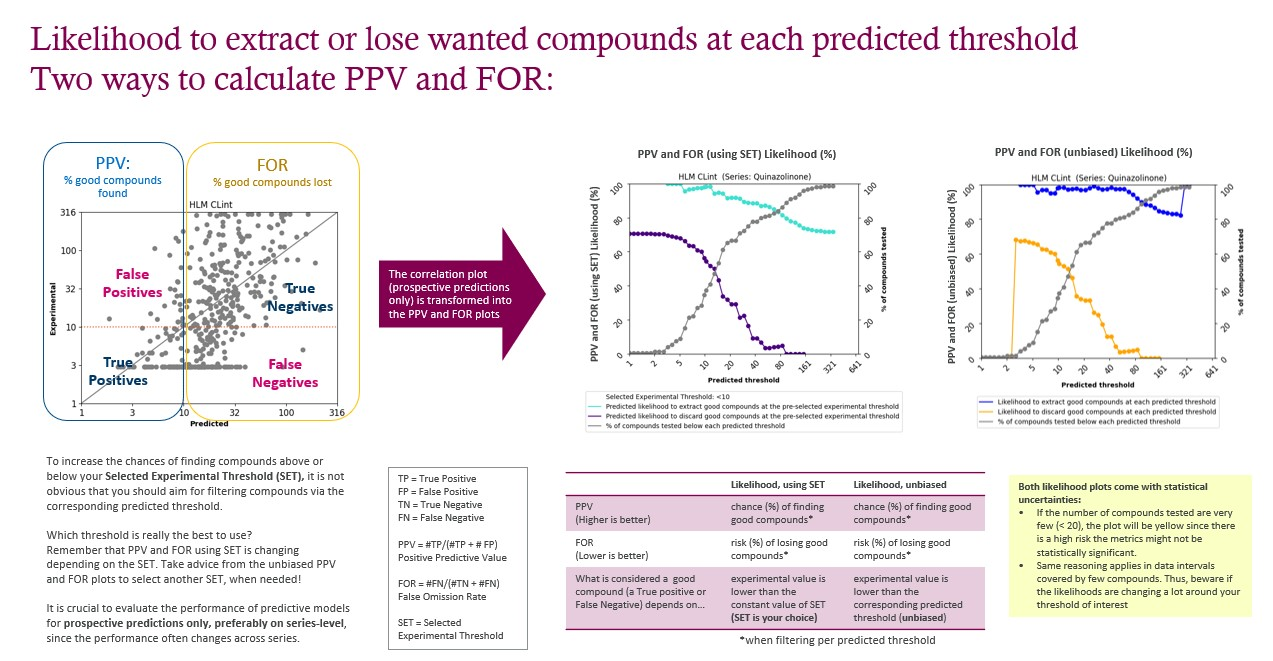


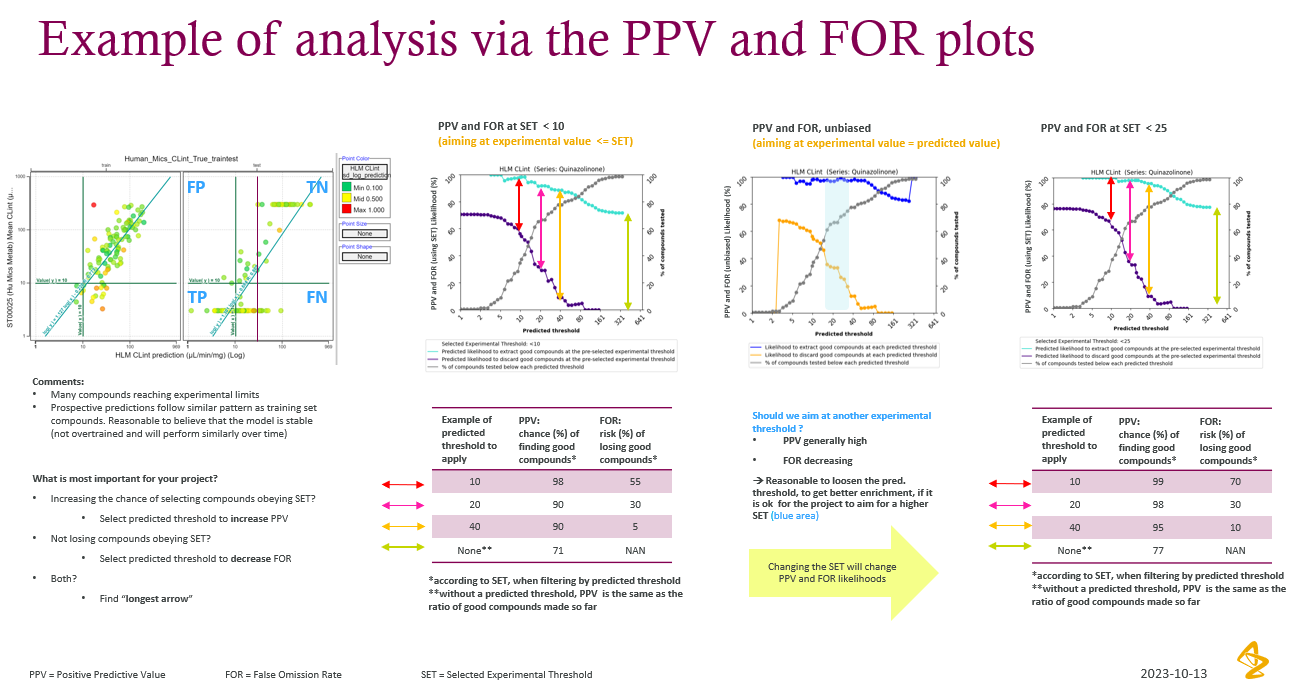



<font color = 'magenta'>
<b> How to track your model perfomance and parameter optimization over time? </b>

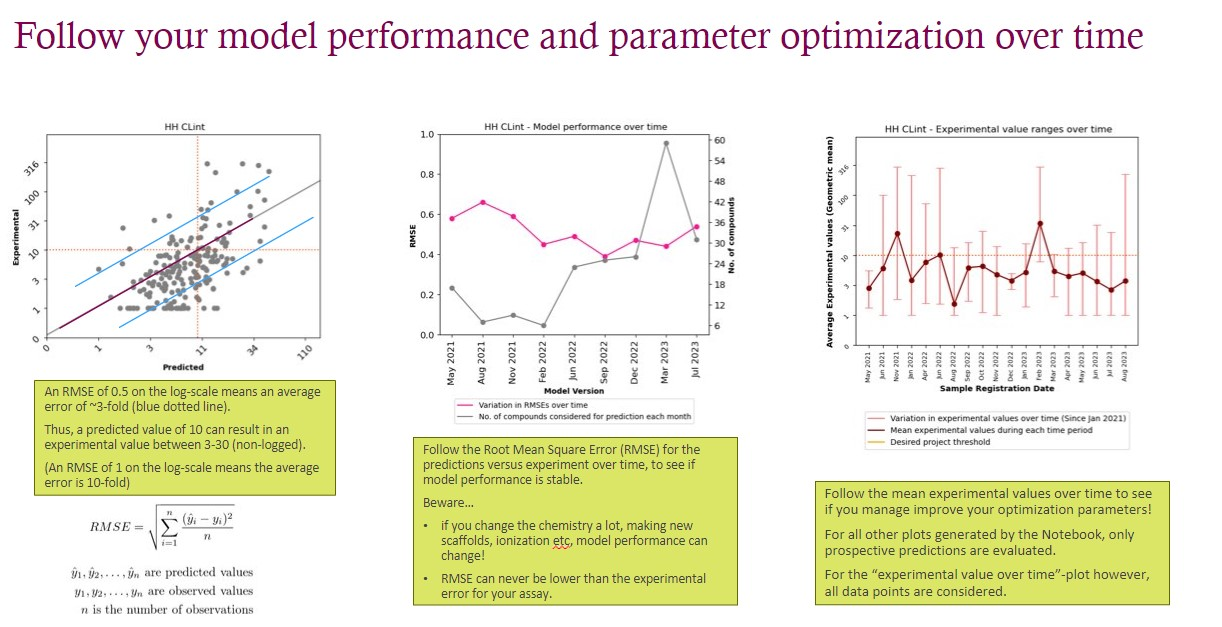


##### A function to evaluate a model's predictive potential for an end point considering all compounds in that project

I/P: Data - Dataframe extracted from your D360 query

observed_column - Experimental end point you are interested in

predicted_column - First predicted values from PIP corresponding to your end point; Use the column name that includes 'Earliest'

trainingSet_column - We are interested in assessing project-specific model performances only for compounds not in the training set;Use the corresponding column that includes the term “traintest” in the column header to extract true test set compounds: For instance, if your predicted column is AZLogD, the test/train annotations are found in the column  “AZLogD_traintest". Please make sure that this column is annotated only with values like train and test.

Model_version - Version of the model that was used to generate the first predicted values

SampleRegistration_Date - Date, when the compound was first registered in the system

PlotScale - Specify, if the property to be plotted is in linear or log PlotScale

PlotTitle - Specify the name that you want to appear on your plot

PosClass - Should your positive class be above or below the threshold? Use '>' for above the threshold and vice-versa

DesiredProjectThreshold - Specify the desired threshold for your project



###### Add your parameters to cells below - Make changes only to Pos_class and DesiredProject_Threshold

###### Model assessments for HLM CLint

### Compounds with measured values : 754

#### Training Set: 131

#### Prospective Validation Set: 623

---


 --- 
 ### Training set metrics


| Metric | Value |
| ------ | ----- |
| Experimental vs Predicted correlation (Coefficient of determination, R2) | 0.57 |
| Root Mean Squared Error (RMSE) | 0.47 |



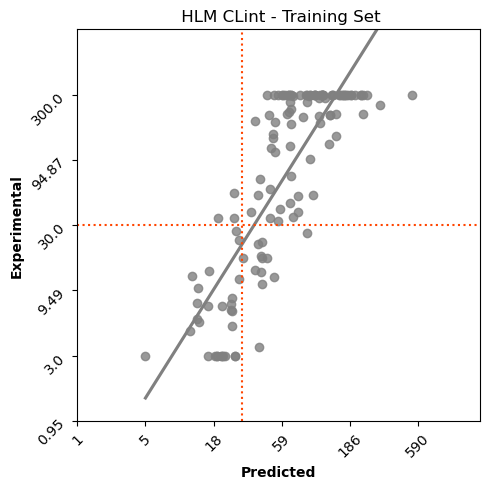


| Prospectively predicted compounds | Value |
| ------ | ----- |
| Below Threshold | 107 |
| Above Threshold | 516 |
| Ratio of good compounds made so far | 17% |        



 --- 
 ### Cumulative metrics on prospective predictions


#### Predicted vs Experimental Values


| Metric | Value |
| ------ | ----- |
| Experimental vs Predicted correlation (Coefficient of determination, R2) | 0.33 |
| Root Mean Squared Error (RMSE) | 0.44 |



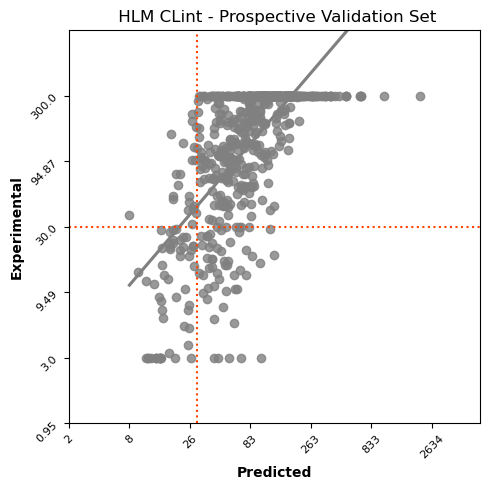


#### Likelihood to predict for threshold


| Threshold Type | Threshold | PPV % | FOR % |
| ------ | ----- | ----- | ----- |
| Pre-selected Experiemental Threshold | 30 | 70 | 9 |
| Recommended Threshold | 18 | 95 | 13 |     


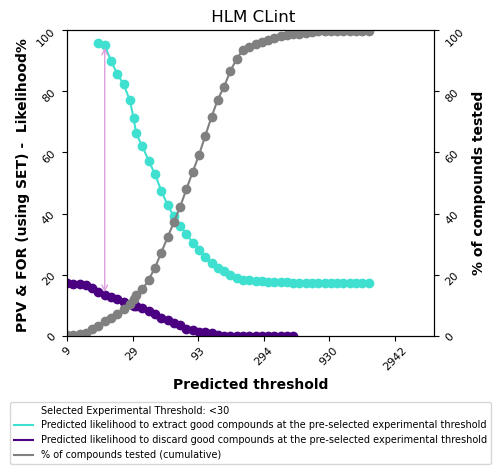


#### Likelihood to predict for threshold [unbiased]


| Threshold | PPV % | FOR % |
| ----- | ----- | ----- |
| 16 | 89 | 6 |     


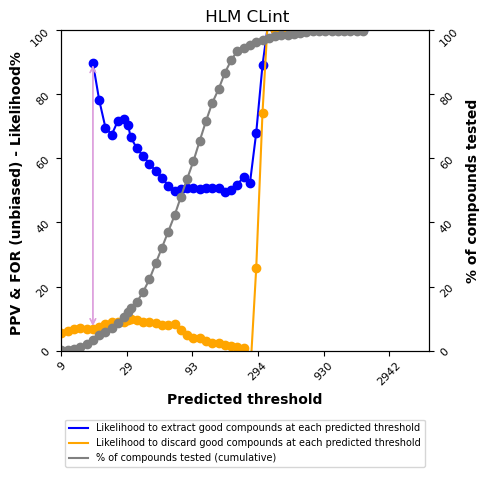


#### Model performance over time

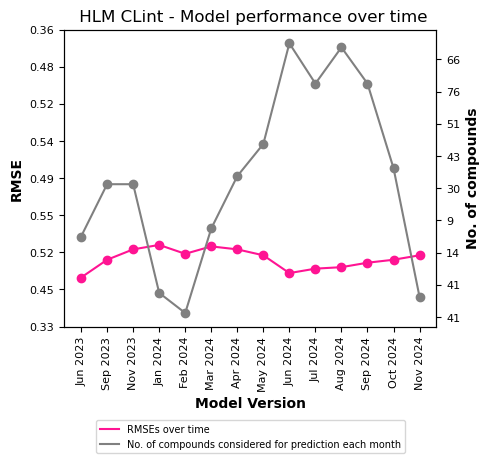


#### Experimental values over time

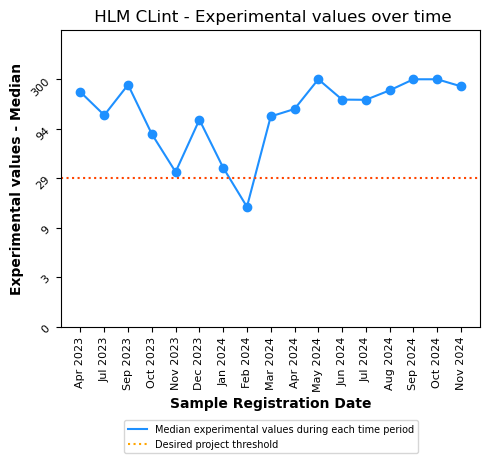


#### Time dependant Similarity/Correlation scores

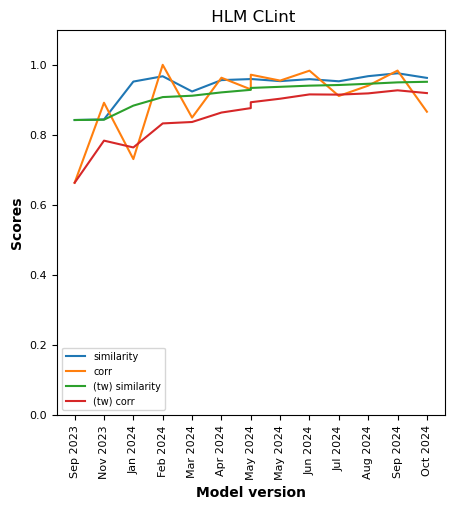

In [3]:
#Assessing predictivity of HLM CLint model; If you use Susanne's query template, the following 5 Predicted inputs would be the same,
#irrespective of the project
Input_df = Data
Observed_column = 'ST00025 (Hu Mics Metab);Mean;CLint (µl/min/mg)'
Predicted_column = 'HLM CLint;Earliest;prediction (μL/min/mg)'
TrainingSet_column = 'HLMCLint;traintest'
Model_version = 'HLM CLint;Method Version; of Earliest prediction (μL/min/mg)'
SampleRegistration_Date = 'First Sample Registration Date'
PlotScale = 'log'
PlotTitle = ' HLM CLint'

#Desired project Threshold and pos_class should be set by the user depending on the project
Pos_class = '<'
DesiredProject_Threshold = 30

PredictiveValidity(Input_df,Observed_column,Predicted_column,TrainingSet_column,Pos_class,DesiredProject_Threshold,Model_version,SampleRegistration_Date,PlotScale,PlotTitle)

###### Model assessments for HH CLint

### Compounds with measured values : 10

#### Training Set: 0

#### Prospective Validation Set: 10

---


 --- 
 ### Training set metrics

Training set is empty - Not possible to generate scatter plots or compute any metrics!



| Prospectively predicted compounds | Value |
| ------ | ----- |
| Below Threshold | 8 |
| Above Threshold | 2 |
| Ratio of good compounds made so far | 80% |        



 --- 
 ### Cumulative metrics on prospective predictions

Less than 20 compounds in the prospective validation set! Please treat the statistics with caution.



#### Predicted vs Experimental Values


| Metric | Value |
| ------ | ----- |
| Experimental vs Predicted correlation (Coefficient of determination, R2) | -1.43 |
| Root Mean Squared Error (RMSE) | 0.49 |



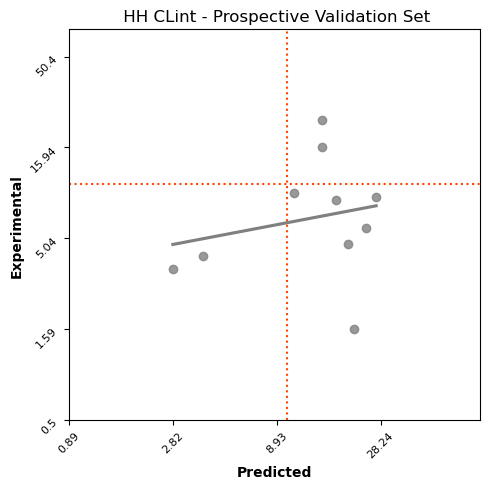


#### Likelihood to predict for threshold


| Threshold Type | Threshold | PPV % | FOR % |
| ------ | ----- | ----- | ----- |
| Pre-selected Experiemental Threshold | 10 | 0 | 75 |
| Recommended Threshold | 0 | N/A | N/A |     


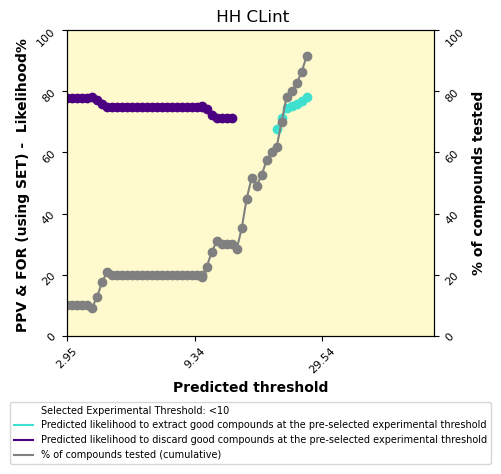


#### Likelihood to predict for threshold [unbiased]


| Threshold | PPV % | FOR % |
| ----- | ----- | ----- |
| 0 | N/A | N/A |     


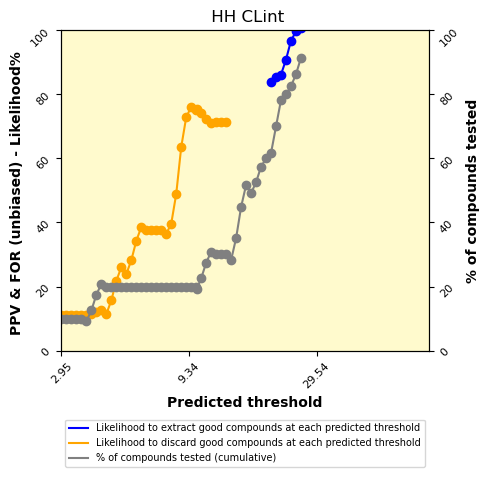


#### Model performance over time



No sufficient data to track model performances for  HH CLint over time!



#### Experimental values over time



No sufficient data beyond Jan 2021 to track experimental values for  HH CLint over time!



#### Time dependant Similarity/Correlation scores

No sufficient datapoints to generate plots!


In [4]:
#Assessing predictivity of HH CLint model; If you use Susanne's query template, the following 5 Predicted inputs would be the same,
#irrespective of the project
Input_df = Data
Observed_column = 'ST00028 (Human Heps Met Clint);GMean;CLint (µl/min/1E6)'
Predicted_column = 'HH CLint;Earliest;prediction (μL/min/1E6)'
TrainingSet_column = 'HHCLint;traintest'
Model_version = 'HH CLint;Method Version; of Earliest prediction (μL/min/1E6)'
SampleRegistration_Date = 'First Sample Registration Date'
PlotScale = 'log'
PlotTitle = ' HH CLint'

#Desired project Threshold and pos_class should be set by the user depending on the project
Pos_class = '<'
DesiredProject_Threshold = 10

PredictiveValidity(Input_df,Observed_column,Predicted_column,TrainingSet_column,Pos_class,DesiredProject_Threshold,Model_version,SampleRegistration_Date,PlotScale,PlotTitle)

###### Model assessments for AZlogD74

### Compounds with measured values : 779

#### Training Set: 2

#### Prospective Validation Set: 777

---


 --- 
 ### Training set metrics

Less than 5 compounds to compute R2 and RMSEs!


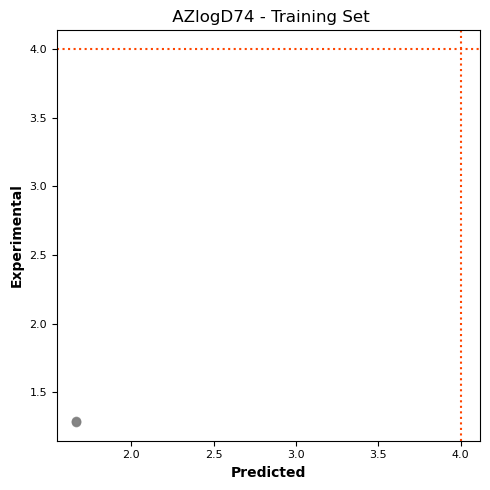


| Prospectively predicted compounds | Value |
| ------ | ----- |
| Below Threshold | 685 |
| Above Threshold | 92 |
| Ratio of good compounds made so far | 88% |        



 --- 
 ### Cumulative metrics on prospective predictions


#### Predicted vs Experimental Values


| Metric | Value |
| ------ | ----- |
| Experimental vs Predicted correlation (Coefficient of determination, R2) | 0.88 |
| Root Mean Squared Error (RMSE) | 0.43 |



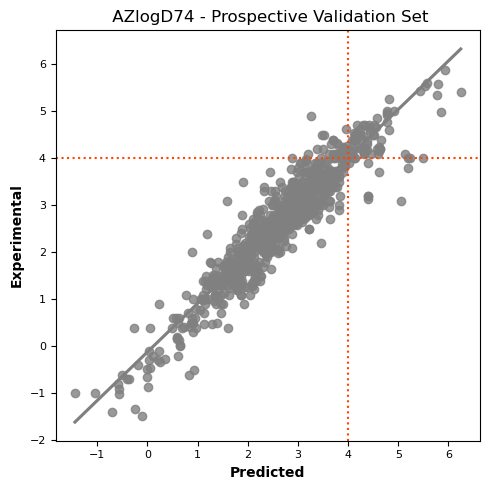


#### Likelihood to predict for threshold


| Threshold Type | Threshold | PPV % | FOR % |
| ------ | ----- | ----- | ----- |
| Pre-selected Experiemental Threshold | 4 | 96 | 17 |
| Recommended Threshold | 4 | 96 | 17 |     


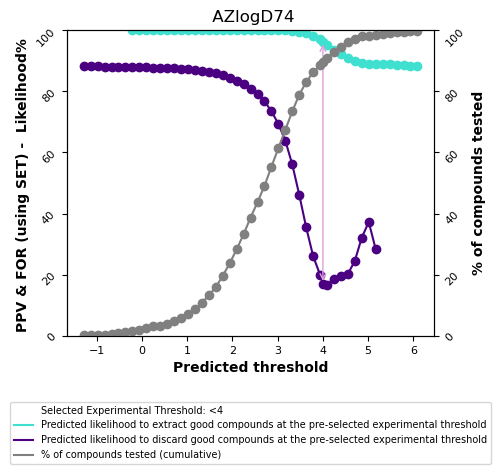


#### Likelihood to predict for threshold [unbiased]


| Threshold | PPV % | FOR % |
| ----- | ----- | ----- |
| 0 | 96 | 2 |     


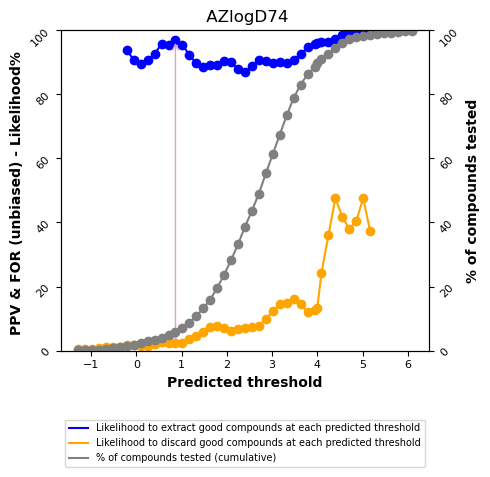


#### Model performance over time

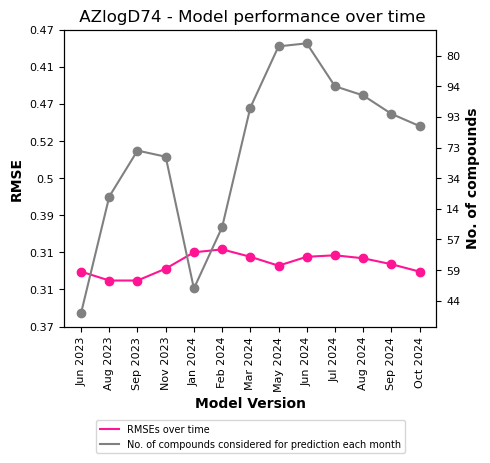


#### Experimental values over time

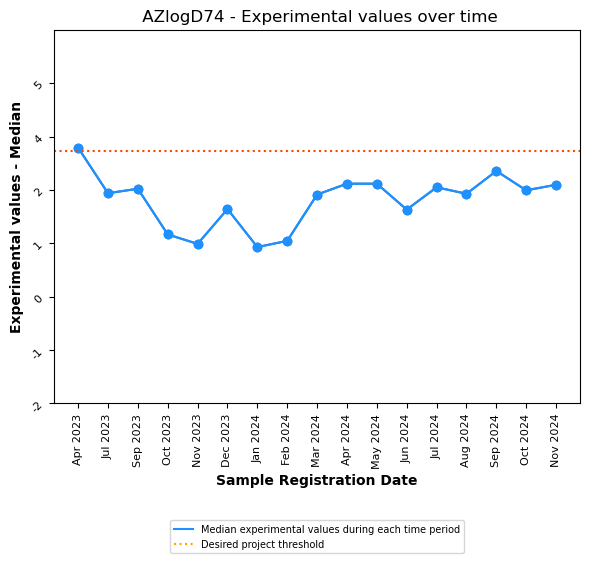


#### Time dependant Similarity/Correlation scores

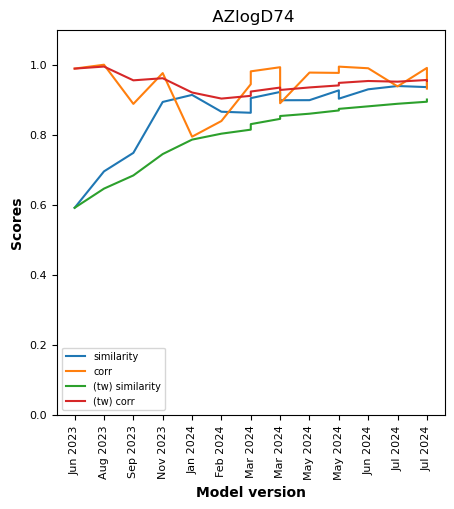

In [5]:
#Assessing predictivity of AZ logD model; If you use Susanne's query template, the following 5 Predicted inputs would be the same,
#irrespective of the project
Input_df = Data
Observed_column = 'ST00021 (LogD octanol pH 7.4);Mean;LogD (none)'
Predicted_column = 'AZlogD74;Earliest;prediction'
TrainingSet_column = 'AZlogD74;traintest'
Model_version = 'AZlogD74;Method Version; of Earliest prediction'
SampleRegistration_Date = 'First Sample Registration Date'
PlotScale = 'linear'
PlotTitle = ' AZlogD74'

#Desired project Threshold and pos_class should be set by the user depending on the project
Pos_class = '<'
DesiredProject_Threshold = 4

PredictiveValidity(Input_df,Observed_column,Predicted_column,TrainingSet_column,Pos_class,DesiredProject_Threshold,Model_version,SampleRegistration_Date,PlotScale,PlotTitle)

###### Model assessments for Solubility

### Compounds with measured values : 780

#### Training Set: 31

#### Prospective Validation Set: 749

---


 --- 
 ### Training set metrics


| Metric | Value |
| ------ | ----- |
| Experimental vs Predicted correlation (Coefficient of determination, R2) | 0.53 |
| Root Mean Squared Error (RMSE) | 0.8 |



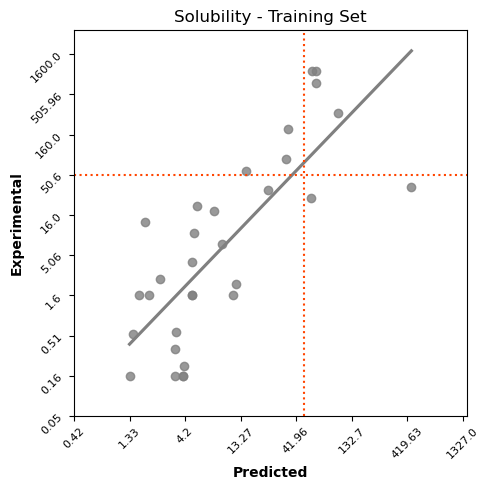


| Prospectively predicted compounds | Value |
| ------ | ----- |
| Below Threshold | 458 |
| Above Threshold | 291 |
| Ratio of good compounds made so far | 38% |        



 --- 
 ### Cumulative metrics on prospective predictions


#### Predicted vs Experimental Values


| Metric | Value |
| ------ | ----- |
| Experimental vs Predicted correlation (Coefficient of determination, R2) | 0.18 |
| Root Mean Squared Error (RMSE) | 1.07 |



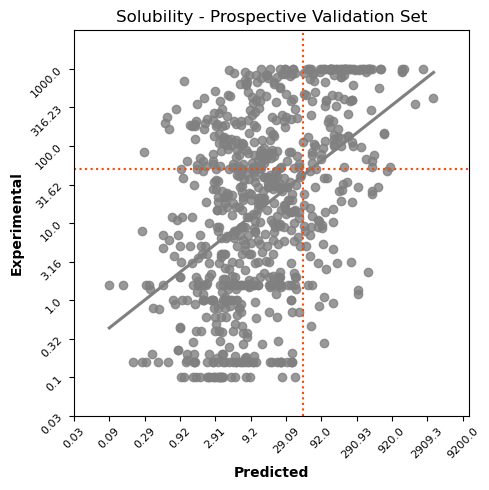


#### Likelihood to predict for threshold


| Threshold Type | Threshold | PPV % | FOR % |
| ------ | ----- | ----- | ----- |
| Pre-selected Experiemental Threshold | 50 | 70 | 29 |
| Recommended Threshold | 813 | 98 | 38 |     


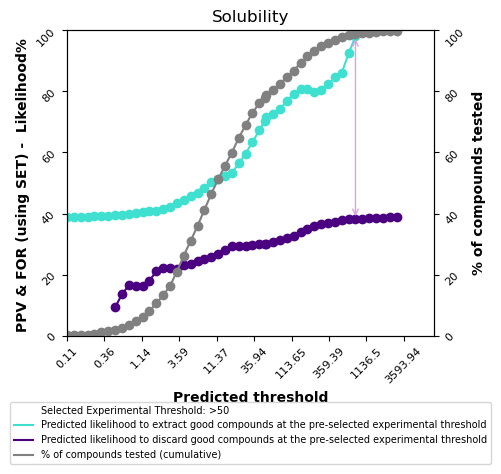


#### Likelihood to predict for threshold [unbiased]


| Threshold | PPV % | FOR % |
| ----- | ----- | ----- |
| 98 | 69 | 21 |     


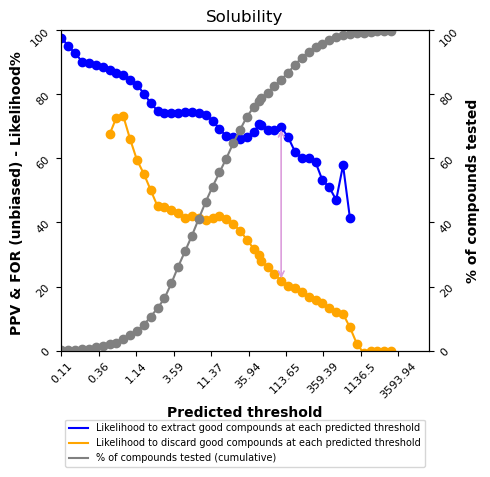


#### Model performance over time

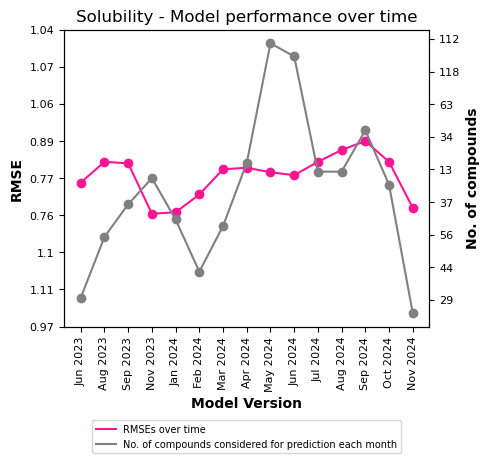


#### Experimental values over time

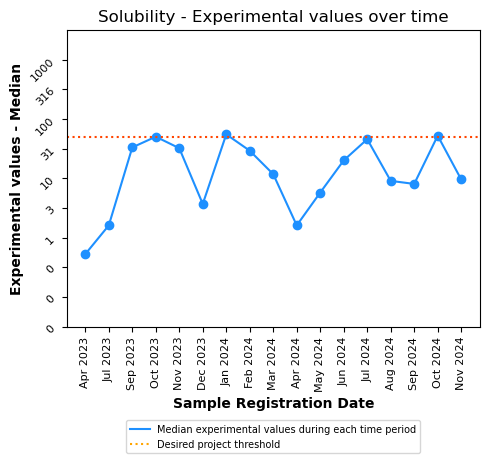


#### Time dependant Similarity/Correlation scores

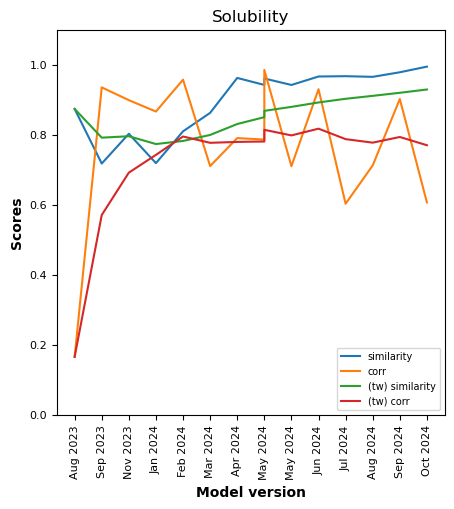

In [6]:
#Assessing predictivity of Solubility model; If you use Susanne's query template, the following 5 Predicted inputs would be the same,
#irrespective of the project
Input_df = Data
Observed_column = 'ST00271 (Solubility pH 7.4 (DMPK wave1));Mean;Solubility (µM)'
Predicted_column = 'Solubility DD;Earliest;prediction (μM)'
TrainingSet_column = 'SolubilityDD;traintest'
Model_version = 'Solubility DD;Method Version; of Earliest prediction (μM)'
SampleRegistration_Date = 'First Sample Registration Date'
PlotScale = 'log'
PlotTitle = 'Solubility'

#Desired project Threshold and pos_class should be set by the user depending on the project
Pos_class = '>'
DesiredProject_Threshold = 50

PredictiveValidity(Input_df,Observed_column,Predicted_column,TrainingSet_column,Pos_class,DesiredProject_Threshold,Model_version,SampleRegistration_Date,PlotScale,PlotTitle)



###### Model assessments for hERG

### Compounds with measured values : 15

#### Training Set: 0

#### Prospective Validation Set: 15

---


 --- 
 ### Training set metrics

Training set is empty - Not possible to generate scatter plots or compute any metrics!



| Prospectively predicted compounds | Value |
| ------ | ----- |
| Below Threshold | 14 |
| Above Threshold | 1 |
| Ratio of good compounds made so far | 6% |        



 --- 
 ### Cumulative metrics on prospective predictions

Less than 20 compounds in the prospective validation set! Please treat the statistics with caution.



#### Predicted vs Experimental Values


| Metric | Value |
| ------ | ----- |
| Experimental vs Predicted correlation (Coefficient of determination, R2) | -0.32 |
| Root Mean Squared Error (RMSE) | 0.55 |



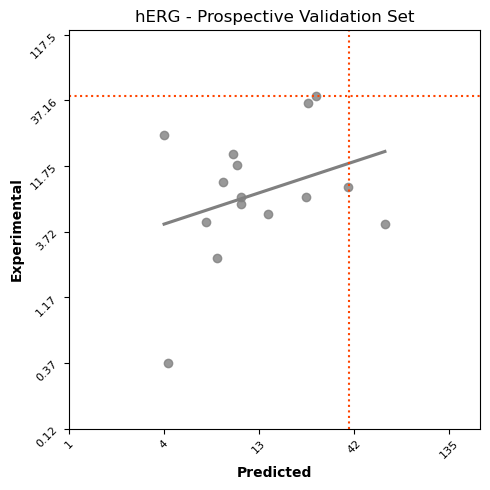


#### Likelihood to predict for threshold


| Threshold Type | Threshold | PPV % | FOR % |
| ------ | ----- | ----- | ----- |
| Pre-selected Experiemental Threshold | 40 | 0 | 7 |
| Recommended Threshold | 11 | 17 | 0 |     


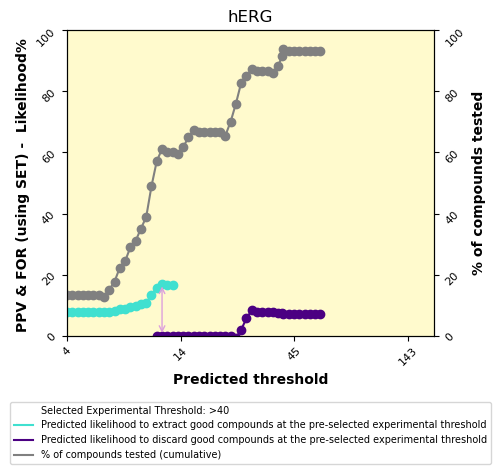


#### Likelihood to predict for threshold [unbiased]


| Threshold | PPV % | FOR % |
| ----- | ----- | ----- |
| 13 | 33 | 22 |     


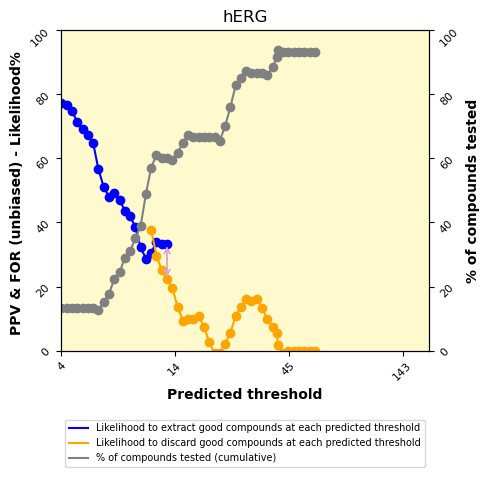


#### Model performance over time



No sufficient data to track model performances for hERG over time!



#### Experimental values over time



No sufficient data beyond Jan 2021 to track experimental values for hERG over time!



#### Time dependant Similarity/Correlation scores

No sufficient datapoints to generate plots!


In [7]:
#Assessing predictivity of hERG model; If you use Susanne's query template, the following 5 Predicted inputs would be the same,
#irrespective of the project
Input_df = Data
Observed_column = 'ST00231 (hERG IC50 Combined);GMean;IC50 (µM)'
Predicted_column = 'hERG;Earliest;IC50 (μM)'
TrainingSet_column = 'hERG;traintest'
Model_version = 'hERG;Method Version; of Earliest IC50 (μM)'
SampleRegistration_Date = 'First Sample Registration Date'
PlotScale='log'
PlotTitle = 'hERG'

##Desired project Threshold and pos_class should be set by the user depending on the project
Pos_class = '>'
DesiredProject_Threshold = 40

PredictiveValidity(Input_df,Observed_column,Predicted_column,TrainingSet_column,Pos_class,DesiredProject_Threshold,Model_version,SampleRegistration_Date,PlotScale,PlotTitle)

###### Model assessments for intrinsic permeability

In [9]:
#NN not available for Permeability models right now
'''
#Assessing predictivity of Caco intrinsic permeability model; If you use Susanne's query template, the following 5 Predicted inputs would be the same,
#irrespective of the project
Input_df = Data
Observed_column = 'ST00216 (Caco-2 intrinsic permeability);Mean;A to B Papp (1E-6.cm/s)'
Predicted_column = 'Caco2 Intrinsic Papp;Earliest;Papp (1E-6cm/sec)'
TrainingSet_column = 'Caco2intr;traintest'
Model_version = 'Caco2 Intrinsic Papp;Method Version; of Earliest Papp (1E-6cm/sec)'
SampleRegistration_Date = 'First Sample Registration Date'

PlotScale='log'
PlotTitle = ' Intrinsic Caco'

#Desired project Threshold and pos_class should be set by the user depending on the project
Pos_class = '>'
DesiredProject_Threshold = 4.2

PredictiveValidity(Input_df,Observed_column,Predicted_column,TrainingSet_column,Pos_class,DesiredProject_Threshold,Model_version,SampleRegistration_Date,PlotScale,PlotTitle)
'''

"\n#Assessing predictivity of Caco intrinsic permeability model; If you use Susanne's query template, the following 5 Predicted inputs would be the same,\n#irrespective of the project\nInput_df = Data\nObserved_column = 'ST00216 (Caco-2 intrinsic permeability);Mean;A to B Papp (1E-6.cm/s)'\nPredicted_column = 'Caco2 Intrinsic Papp;Earliest;Papp (1E-6cm/sec)'\nTrainingSet_column = 'Caco2intr;traintest'\nModel_version = 'Caco2 Intrinsic Papp;Method Version; of Earliest Papp (1E-6cm/sec)'\nSampleRegistration_Date = 'First Sample Registration Date'\n\nPlotScale='log'\nPlotTitle = ' Intrinsic Caco'\n\n#Desired project Threshold and pos_class should be set by the user depending on the project\nPos_class = '>'\nDesiredProject_Threshold = 4.2\n\nPredictiveValidity(Input_df,Observed_column,Predicted_column,TrainingSet_column,Pos_class,DesiredProject_Threshold,Model_version,SampleRegistration_Date,PlotScale,PlotTitle)\n"

###### Model assessments for Caco efflux ratios

In [10]:
#NN not available for Permeability models right now
'''
#Assessing predictivity of Caco Efflux ratio model; If you use Susanne's query template, the following 5 Predicted inputs would be the same,
#irrespective of the project
Input_df = Data
Observed_column = 'ST00024 (Hu Caco2 Efflux);Mean;Efflux Ratio (none)'
Predicted_column = 'Caco2 Efflux;Earliest;Efflux Ratio'
TrainingSet_column = 'Caco2efflux;traintest'
Model_version = 'Caco2 Efflux;Method Version; of Earliest Efflux Ratio'
SampleRegistration_Date = 'First Sample Registration Date'
PlotScale='log'
PlotTitle = ' Caco Efflux ratio'

#Desired project Threshold and pos_class should be set by the user depending on the project
Pos_class = '>'
DesiredProject_Threshold = 3

PredictiveValidity(Input_df,Observed_column,Predicted_column,TrainingSet_column,Pos_class,DesiredProject_Threshold,Model_version,SampleRegistration_Date,PlotScale,PlotTitle)
'''

"\n#Assessing predictivity of Caco Efflux ratio model; If you use Susanne's query template, the following 5 Predicted inputs would be the same,\n#irrespective of the project\nInput_df = Data\nObserved_column = 'ST00024 (Hu Caco2 Efflux);Mean;Efflux Ratio (none)'\nPredicted_column = 'Caco2 Efflux;Earliest;Efflux Ratio'\nTrainingSet_column = 'Caco2efflux;traintest'\nModel_version = 'Caco2 Efflux;Method Version; of Earliest Efflux Ratio'\nSampleRegistration_Date = 'First Sample Registration Date'\nPlotScale='log'\nPlotTitle = ' Caco Efflux ratio'\n\n#Desired project Threshold and pos_class should be set by the user depending on the project\nPos_class = '>'\nDesiredProject_Threshold = 3\n\nPredictiveValidity(Input_df,Observed_column,Predicted_column,TrainingSet_column,Pos_class,DesiredProject_Threshold,Model_version,SampleRegistration_Date,PlotScale,PlotTitle)\n"